# Tutorial on Classification II: Dimension reduction


<div class="alert alert-block alert-success">
    <b>Context</b>
    
- Fisher Linear discriminant analysis (dimension reduction)
- Classification by month
    
</div>

In this tutorial, we are going to use the same data set as in the previous tutorial except that we are now going to explore the concept of dimension reduction. We still consider the same problem of classifying the days into rainy and dry days. In the original data set, there are 10 input features and we already saw that pressure is a good predictor. What about the other variables? 

Let's first prepare the data set as we did in the previous tutorial: we load meteorological variables for paris for between 2000 and 2009 (subset of the ERA5 data set). As before, we assign each day to a class "rainy day" or "dry day". We also split this data set into a training data set and a test data set with the method `train_test_split` of the scikit-learn library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/era5_paris_sf_2000_2009.csv", index_col='time', parse_dates=True)
df_norm = (df - df.mean()) /df.std()
df_day = df_norm.resample("D").mean()

# normalized threshold
precip_th = -0.2
# add tag 
df_day['tag'] = df_day['tp'].where(df_day['tp']> precip_th, 0)
df_day['tag'] = df_day['tag'].where(df_day['tp']<= precip_th, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_day.drop(columns=['tp', 'tag']),df_day['tag'],test_size=.3,random_state=0)

In the previous tutorial, we used the LDA method to predict the class of the data set. If you assume that the data set is Gaussian, Fisher-LDA is actually equivalent to the LDA and so we core functions are the same in Scikit-learn. There is however one extra interesting feature that we derived in Fisher-LDA because it can be used as a dimension reduction method. These new dimensions are the one that maximize the *between-class* variance and minimize the *within-class* variance.

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

Fit the train data set with the LDA model?

In [4]:
# your code here
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Make a prediction for the train and test data sets.

In [5]:
# your code here
y_pred = lda.predict(X_test)
y_pred2 = lda.predict(X_train)

You can visualize a summary of the results with `classification_report`

In [6]:
from sklearn.metrics import classification_report
# your code here
print (classification_report(y_test,y_pred))
print (classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       646
         1.0       0.78      0.77      0.77       450

    accuracy                           0.81      1096
   macro avg       0.81      0.81      0.81      1096
weighted avg       0.81      0.81      0.81      1096

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1454
         1.0       0.79      0.76      0.77      1103

    accuracy                           0.81      2557
   macro avg       0.80      0.80      0.80      2557
weighted avg       0.81      0.81      0.81      2557



> ***Question***
> - Do you feel like this model with more input features is doing better perdiction than the previous model that had only 2 input features?

<span style="color:red">If we compare the raw score, there seems to be an improvement compared to the previous tutorial. Note that both the training data set and testing data set have the same error.</span>.

So maybe one (or more) of these extra features is helping doing a better prediction. F-LDA can help us shrink the data set to only 1 dimension that is the best dimension for classification. This dimension no longer has a physical meaning but we can use it to compact a data set while still retaining the cluster separation.

> ***Question***
> - With the function `lda.transform`, project the data set onto that particular dimension.

In [7]:
# your code here
X_lda = lda.transform(X_train)

> ***Question***
> - What is the dimension of X_lda? Why?
> - Split the table `X_lda` into two distinct arrays: one for rainy days and one for dry days.

In [8]:
#X_lda has dimension 1. The LDA method will always give K-1 dimensions on which we can project the data set/

# It is actually simpler to write the projected data in the dataframe
X_train['X_lda'] = X_lda

#x_lda_rain = X_lda[y_train == 0].squeeze()
#x_lda_norain = X_lda[y_train == 1].squeeze()

In [9]:
y_train

time
2002-01-15    1.0
2008-09-22    0.0
2005-06-04    1.0
2009-04-18    1.0
2007-05-06    0.0
             ... 
2002-04-15    1.0
2008-12-08    0.0
2004-07-11    1.0
2007-02-20    0.0
2007-06-25    1.0
Name: tag, Length: 2557, dtype: float64

In the same figure, do a boxplot for these two data set for (one box plot for each class)

Text(0.5, 0, '')

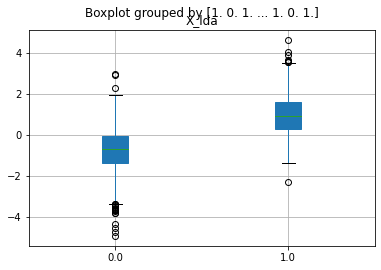

In [10]:
# your answer here
X_train.boxplot(column=['X_lda'], by=y_train.values,patch_artist = True)
plt.xlabel("")

> ***Question***
> - Plot the histogram of this projected data for each class.

tag
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: X_lda, dtype: object

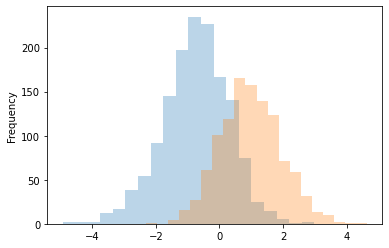

In [11]:
# your answer here
X_train['X_lda'].groupby(y_train).plot.hist(bins=20, alpha=0.3)

So we shrinked our 10-dimensional data set into a 1d data set... and this dimension is even better than pressure only to perform a classification. If we need to represent the data and highlight the class separation, we probably need to use this dimension.

### Fisher LDA in 2D

By design, the maximum number of dimensions that you can get is $K-1$, where $K$ is the number of classes. We are going to explore how 3 different months really belong to 3 distinct categories.

Adjust the parameters in the code below to select 3 months: you can pick months that are close in time or instead far apart.

In [12]:
mo1 = 1
mo2 = 7
mo3 = 8

X = df_day[df_day.index.month.isin([mo1,mo2, mo3])]
y = df_day[df_day.index.month.isin([mo1,mo2, mo3])].index.month

Follow the exact same methodology as before and do a scatter plot of the projected data in 2d. Use a different color code for each class.

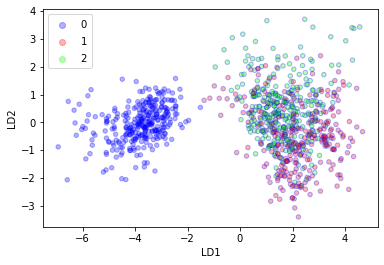

In [13]:
# your code here
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X,y)

# equaly spaced (for the colorbar)
ycol = y.values
ycol = np.where(ycol == mo1,0,ycol)
ycol = np.where(ycol == mo2,1,ycol)
ycol = np.where(ycol == mo3,2,ycol)

plt.figure()
plt.xlabel('LD1')
plt.ylabel('LD2')
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=ycol, label=ycol, cmap='brg', alpha=0.3, s = 20, edgecolors='b')
plt.legend(*scatter.legend_elements())

In this 2d space, you can visualize two elements:
- The between class spread (how classes are separated from each other)
- The within class spread (how points within a class are separated from each other).

<span style="color:red">In the figure above, we see that there is a clear separation line between January and July/August. This separation is naturally captured by the first dimension of the projection (maximum class separability). The second dimension captures the separation between July and August.  </span>

Of course months that are well separated in time will exhibit a large between class gap compared to months that are close.

> ***Questions***
> - Which variables are responsible for that separation?
> - try to remove these variables from your model, and see if you can you still separate months appart? 

<span style="color:red">In the figure above, we see that there is a clear separation line between January and July/August. This separation is naturally captured by the first dimension of the projection (maximum class separability). The second dimension captures the separation between July and August.  </span>

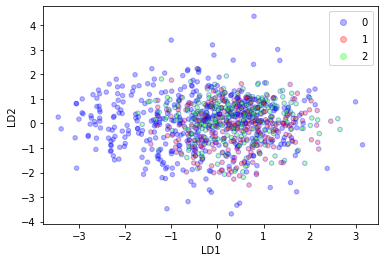

In [14]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X.drop(columns=['t2m', 'skt', 'ssrd', 'd2m']),y)

# equaly spaced (for the colorbar)
ycol = y.values
ycol = np.where(ycol == mo1,0,ycol)
ycol = np.where(ycol == mo2,1,ycol)
ycol = np.where(ycol == mo3,2,ycol)

plt.figure()
plt.xlabel('LD1')
plt.ylabel('LD2')
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=ycol, label=ycol, cmap='brg', alpha=0.3, s = 20, edgecolors='b')
plt.legend(*scatter.legend_elements())

<span style="color:red"> if we remove all thermodynamical variables + solar radiation, there is no longer a clear separation between months.
</span>

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>